# Row Swap

In [15]:
import numpy as np
import matplotlib.pyplot as plt
def swaprow(i, j, A):
    tmp = A[i].copy()  #  to create a copy of the i-th row in A because we don't want to modify the original row before the swap
    A[i] = A[j]
    A[j] = tmp

In [1]:
# For an efficiency avoid unneccesary coying of row.
#Make code more concise.

def swaprow_(i, j, A):
    A[i, :], A[j, :] = A[j, :].copy(), A[i, :].copy()  # copying the row while swaping them to avoid unintended change.

In [4]:
# Example.
import numpy as np
A = np.array([[1, 2, 3],
              [10, 11, 12],
              [7, 8, 9]])
swaprow(0, 1, A)

print(A)

[[10 11 12]
 [ 1  2  3]
 [ 7  8  9]]


In [5]:
A = np.array([[1, 2, 3],
              [10, 11, 12],
              [7, 8, 9]])
swaprow_(0,1,A)
print(A)

[[10 11 12]
 [ 1  2  3]
 [ 7  8  9]]


# Averaging Matrix

In [12]:
# Create averaging operator
def average_oper(n,k):
    a=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if(abs(i-j)<=k):
                a[i,j]=1
        
    row_sum=a.sum(axis=1)
    a /= row_sum[:, np.newaxis]
    return a
                

In [13]:
# Test our code.
n=20
k=2
a=average_oper(n,k)
print(a)

[[0.33333333 0.33333333 0.33333333 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.25       0.25       0.25       0.25       0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.2        0.2        0.2        0.2        0.2        0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.2        0.2        0.2        0.2        0.2
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.2        0.2        0.2        0.2
  0.2        0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0

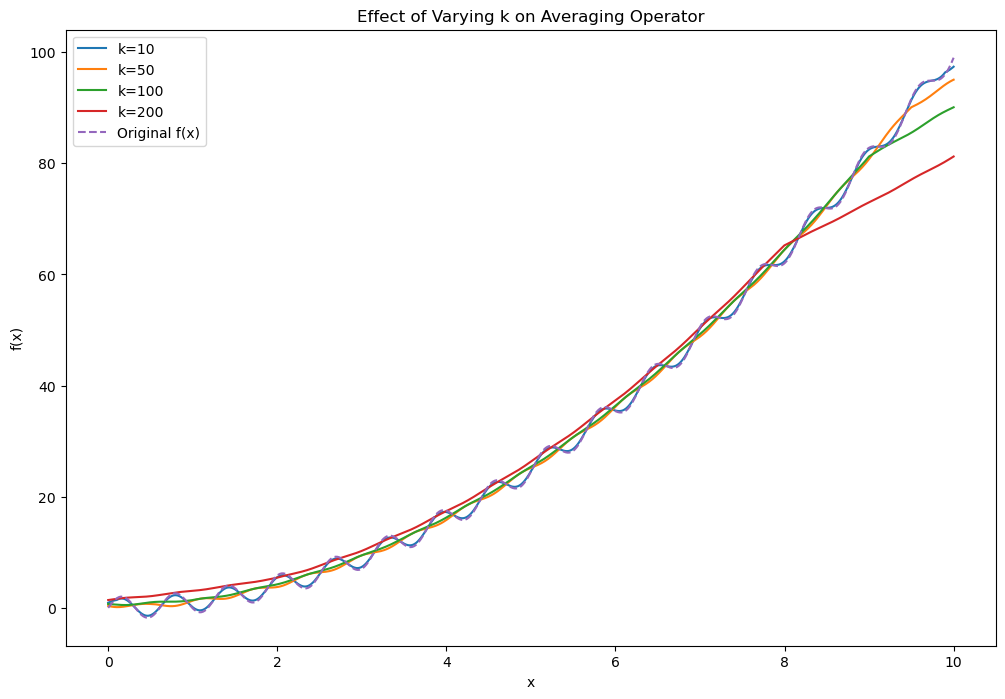

In [16]:
# Apply a vector.
# Define the function f(x)
def f(x):
    return x**2 + 2 * np.sin(10 * x)

# Parameters
n = 1000  # Number of points
k_values = [10, 50, 100, 200]  # Varying k values

 #Generate the vector of x values
x = np.linspace(0, 10, n)

# Calculate the function values f(x)
f_x = f(x)

#  Apply the averaging operator for different k values and plot the results
plt.figure(figsize=(12, 8))
for k in k_values:
    A = average_oper(n, k)
    smoothed_result = np.dot(A, f_x)
    plt.plot(x, smoothed_result, label=f'k={k}')

# Plot the original function
plt.plot(x, f_x, label='Original f(x)', linestyle='--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Effect of Varying k on Averaging Operator')
plt.legend()
plt.show()









In [17]:
# Result 
# Larger the value of K result in smoother curve
# Small values capture fine details.

# Differentiation matrix

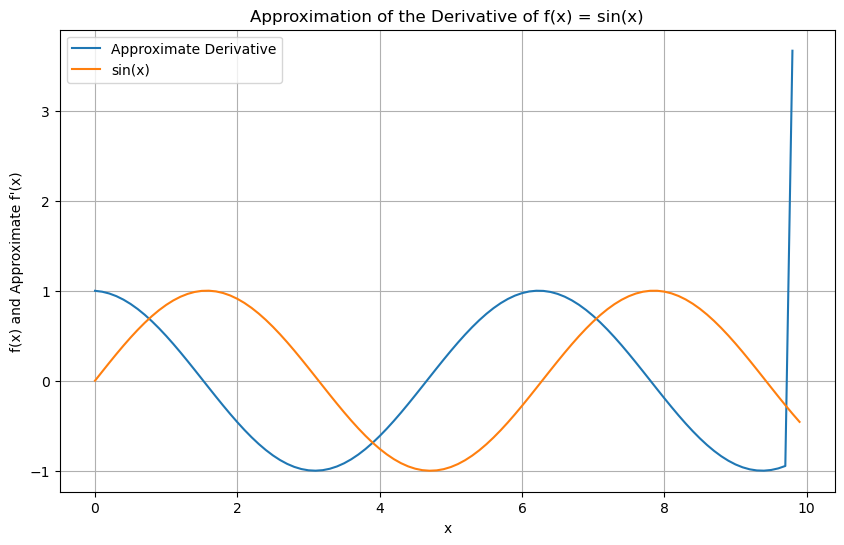

In [29]:
# For f(x)=sinx
# Define grid parameters.
n = 100  # Number of points
h = 0.1  # Grid spacing

# Create the vector x representing grid points
x = np.arange(0, n * h, h)

# Calculate the values of the function f(x) = sin(x)
f_x = np.sin(x)


# Step 3: Create the differentiation matrix D manually
diag_values = [-1] * (n - 1) + [1] * (n - 1)
D = np.zeros((n - 1, n))
D[np.arange(n - 1), np.arange(n - 1)] = -1
D[np.arange(n - 1), np.arange(n - 1) + 1] = 1

# Divide by h to approximate the derivative
D /= h
# Remove the last row to match dimensions
D = D[:, :-1]

# Apply D to the vector of function values to approximate the derivative
f_prime_approx = np.dot(D, f_x[:-1])  

# Plot the original function and its derivative approximation
plt.figure(figsize=(10, 6))
plt.plot(x[:-1], f_prime_approx, label="Approximate Derivative")
plt.plot(x, f_x, label="sin(x)")
plt.xlabel("x")
plt.ylabel("f(x) and Approximate f'(x)")
plt.title("Approximation of the Derivative of f(x) = sin(x)")
plt.legend()
plt.grid(True)
plt.show()

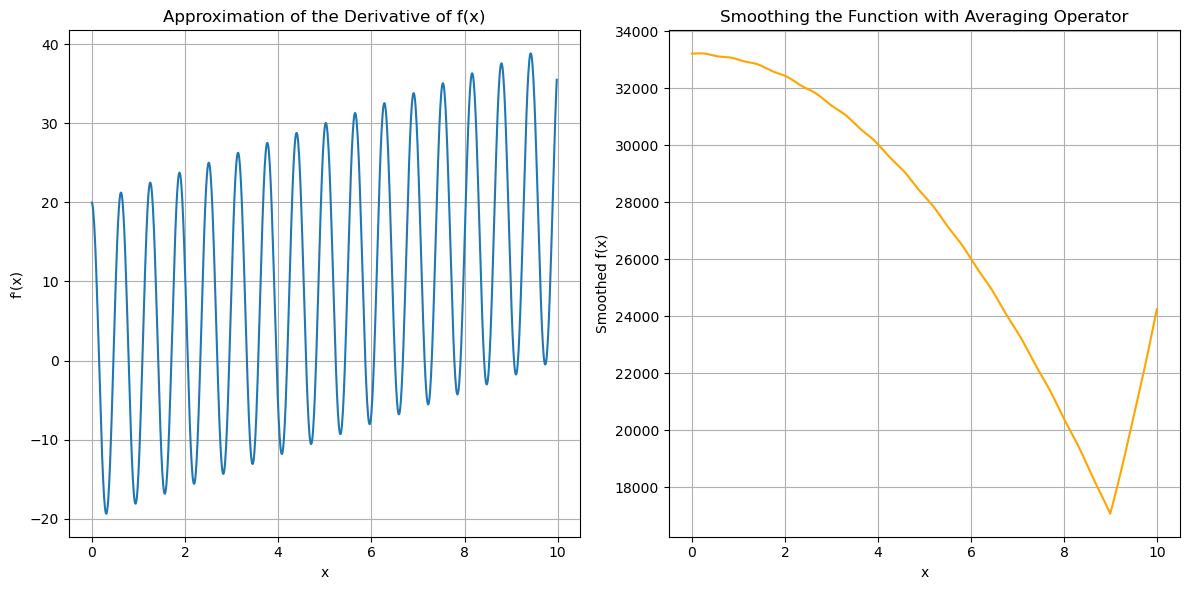

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid parameters
n = 1000  # Number of points
h = 0.01  # Grid spacing

 Create the vector x representing grid points
x = np.arange(0, n * h, h)

 Calculate the values of the function f(x) = x^2 + 2 * sin(10x)
f_x = x**2 + 2 * np.sin(10 * x)

#Create the differentiation matrix D manually with float64 data type
diag_values = [-1] * (n - 1) + [1] * (n - 1)
D = np.zeros((n - 1, n))
D[np.arange(n - 1), np.arange(n - 1)] = -1
D[np.arange(n - 1), np.arange(n - 1) + 1] = 1

# Divide by h to approximate the derivative
D = D / h

# Apply D to the vector of function values to approximate the derivative
f_prime_approx = np.dot(D, f_x)

# Plot the original function and its derivative approximation
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(x[:-1], f_prime_approx, label="Approximate Derivative")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Approximation of the Derivative of f(x)")
plt.grid(True)

#  Apply the averaging operator A from the previous exercise
k = 100  # Value of k for the averaging operator
A = np.ones((n, n))
for i in range(n):
    A[i, max(0, i - k):min(n, i + k + 1)] = 1.0 / (2 * k + 1)

# Apply A to the original function
f_smoothed = np.dot(A, f_x)

# Plot the smoothed function
plt.subplot(122)
plt.plot(x, f_smoothed, label="Smoothed Function", color='orange')
plt.xlabel("x")
plt.ylabel("Smoothed f(x)")
plt.title("Smoothing the Function with Averaging Operator")
plt.grid(True)

plt.tight_layout()
plt.show()
